In [2]:
import pandas as pd
import numpy as np

In [4]:
s1 = pd.Series([0.2, 0.4, 0.6, 0.8])

In [6]:
s1.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
s1.values

array([0.2, 0.4, 0.6, 0.8])

In [8]:
s1[0]

0.2

In [9]:
s2 = pd.Series([1, 2], index=['a', 'b'])

In [11]:
s2.index

Index(['a', 'b'], dtype='object')

In [13]:
np.array([0.2, 0.4, 0.6, 0.8])

array([0.2, 0.4, 0.6, 0.8])

In [16]:
age_data = {'francois': 61, 'angela': 51, 'barack': 55}

In [17]:
s3 = pd.Series(age_data)

In [18]:
s3

francois    61
angela      51
barack      55
dtype: int64

In [19]:
s3[s3 > 54]

francois    61
barack      55
dtype: int64

In [20]:
s3 > 54

francois     True
angela      False
barack       True
dtype: bool

In [21]:
s3 * 2

francois    122
angela      102
barack      110
dtype: int64

In [22]:
[1, 2] * 2

[1, 2, 1, 2]

In [24]:
np.exp(s3)

francois    3.104298e+26
angela      1.409349e+22
barack      7.694785e+23
dtype: float64

In [26]:
s3.values * 2

array([122, 102, 110])

In [40]:
s3.sum()

167

## Classes

In [29]:
def f(x):
    return x + 1

In [35]:
class Car:
    color = ""
    brand = ""
    
    def __init__(self, color, brand):
        self.color = color
        self.brand = brand
        
    def is_french(self):
        return self.brand in ["renault", "peugeot"]

In [36]:
my_first_car = Car("blanche", "renault")

In [37]:
my_first_car.color

'blanche'

In [38]:
my_first_car.is_french()

True

In [39]:
Car("blanche", "fiat").is_french()

False

## Fin

In [43]:
"angel" in s3

False

In [44]:
s3

francois    61
angela      51
barack      55
dtype: int64

In [57]:
s3["angela", "barack"]

51

In [47]:
s2 + s3 # NaN means "Not a Number"

a          NaN
angela     NaN
b          NaN
barack     NaN
francois   NaN
dtype: float64

In [52]:
s4 = s3 + s3[["angela", "barack"]]

In [53]:
s4

angela      102.0
barack      110.0
francois      NaN
dtype: float64

In [55]:
s4[s4.isnull()]

francois   NaN
dtype: float64

In [58]:
s4[s4.notnull()]

angela    102.0
barack    110.0
dtype: float64

In [61]:
s4[~s4.isnull()]

angela    102.0
barack    110.0
dtype: float64

## DataFrames

In [63]:
data = {
    "name": ["banane", "kiwi", "pomme", "pasteque"],
    "price": [2.5, 3, 1, 4.12],
    "weight": [100, 50, 40, 2500],
}

In [64]:
df = pd.DataFrame(data)

In [65]:
df

,name,price,weight
0,banane,2.50,100
1,kiwi,3.00,50
2,pomme,1.00,40
3,pasteque,4.12,2500


In [66]:
df.columns

Index(['name', 'price', 'weight'], dtype='object')

In [67]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
name      4 non-null object
price     4 non-null float64
weight    4 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


In [69]:
df.describe()

,price,weight
count,4.000000,4.000000
mean,2.655000,672.500000
std,1.294643,1218.616018
min,1.000000,40.000000
25%,2.125000,47.500000
50%,2.750000,75.000000
75%,3.280000,700.000000
max,4.120000,2500.000000


In [71]:
df

,name,price,weight
0,banane,2.50,100
1,kiwi,3.00,50
2,pomme,1.00,40
3,pasteque,4.12,2500


In [74]:
df = df.set_index("name")  # df.set_index("name", inplace=True)

In [75]:
df

,price,weight
name,,
banane,2.50,100
kiwi,3.00,50
pomme,1.00,40
pasteque,4.12,2500


In [81]:
df.loc[["kiwi", "pomme"],"price"]

name
kiwi     3.0
pomme    1.0
Name: price, dtype: float64

In [86]:
df.iloc[0:2,1:]

,weight
name,
banane,100
kiwi,50


In [90]:
type(df["price"])

pandas.core.series.Series

In [92]:
df["price"].mean()

2.6550000000000002

In [93]:
df["price"] / 2

name
banane      1.25
kiwi        1.50
pomme       0.50
pasteque    2.06
Name: price, dtype: float64

In [96]:
df["price_per_kg"] = df["price"] / (df["weight"] / 1000)

In [97]:
df

,price,weight,price_per_kg
name,,,
banane,2.50,100,25.000
kiwi,3.00,50,60.000
pomme,1.00,40,25.000
pasteque,4.12,2500,1.648


In [104]:
df[(df["price"] > 2.6) & (df["weight"] > 100)]  # or -> |

,price,weight,price_per_kg
name,,,
pasteque,4.12,2500,1.648


## Prénoms conseillers

In [3]:
df = pd.read_csv("prenoms.csv", sep=";")

In [247]:
df["nb"].sum() / 35000

15.056828571428571

In [248]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [249]:
df[df["genre"] == "M"]["nb"].sum()

342264

In [250]:
df[df["genre"] == "F"]["nb"].sum() / df["nb"].sum()

0.35052913817935477

## Combien de prénoms unisexes a-t-on?

In [251]:
count = df.groupby('prenom').count()

In [9]:
df.groupby("prenom").agg({"genre": "count", "nb": "sum"})

In [16]:
df["prenom"].apply(lambda x: len(str(x))) # df["prenom"].str.len()

0         6
1         5
2         8
3         7
4         9
5         6
6         6
7        11
8         7
9         6
10        6
11        7
12       11
13        6
14        7
15        4
16        4
17        9
18        5
19        6
20       10
21        7
22        9
23        9
24        8
25        8
26        6
27        3
28        7
29        8
         ..
12437     9
12438     7
12439    14
12440     6
12441    13
12442     7
12443     8
12444    12
12445    10
12446     7
12447    23
12448     5
12449     8
12450    12
12451     7
12452     4
12453    17
12454    13
12455    11
12456    20
12457     6
12458    14
12459     5
12460     9
12461    12
12462     9
12463     6
12464     6
12465     6
12466     8
Name: prenom, Length: 12467, dtype: int64

In [252]:
count[count["genre"] == 2]

,genre,nb
prenom,,
A. Marie,2,2
Abdelkader,2,2
Achille,2,2
Adda,2,2
Agathe,2,2
Agnes,2,2
Agnès,2,2
Agnés,2,2
Aimée,2,2


In [17]:
df[df["prenom"] == "Agnés"]

,prenom,genre,nb
695,Agnés,F,33
6853,Agnés,M,1


## Quels sont les prénoms composés en Jean-x

In [254]:
mask = df["prenom"].apply(lambda x: isinstance(x, str) and "Jean-" in x)

In [255]:
df[mask]

,prenom,genre,nb
7,Jean-Pierre,M,6945
12,Jean-Claude,M,5952
33,Jean-Paul,M,3547
38,Jean-Luc,M,3361
42,Jean-Louis,M,3155
46,Jean-Marie,M,2863
51,Jean-François,M,2772
52,Jean-Michel,M,2595
62,Jean-Marc,M,2276
86,Jean-Jacques,M,1660


In [256]:
df[df["prenom"].str.contains("Jean-").fillna(False)]

,prenom,genre,nb
7,Jean-Pierre,M,6945
12,Jean-Claude,M,5952
33,Jean-Paul,M,3547
38,Jean-Luc,M,3361
42,Jean-Louis,M,3155
46,Jean-Marie,M,2863
51,Jean-François,M,2772
52,Jean-Michel,M,2595
62,Jean-Marc,M,2276
86,Jean-Jacques,M,1660


## Trouver le prénom le plus long

In [257]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [19]:
df[df["prenom"].isnull()]

,prenom,genre,nb
2090,NaN,M,5
4224,NaN,F,2


In [32]:
df["p_len"] = df["prenom"].fillna("").apply(lambda x: len(x))

In [259]:
df.head()

,prenom,genre,nb,p_len
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


In [260]:
df.sort_values('p_len', ascending=False)

,prenom,genre,nb,p_len
4874,"Christiane, Victoire Marie-Emm",F,1,30
6750,Emilienne Marieta Atea Vahine,F,1,29
11671,Freddy Tapunui Vane Dit Coco,M,1,28
12231,Marie Lamberte Dite Alisette,F,1,28
11579,Sophie Yvonne Rosalie Marie,F,1,27
8479,Marie Scholastique Béatrice,F,1,27
9582,"Sittiratie, Fourahati, Zéna",F,1,27
11158,"Anne-Sophie, Marie, Chantal",F,1,27
4601,Law De Lauriston De Boubers,M,1,27
10921,Averii Dite Kiki Christiane,F,1,27


In [261]:
df["prenom"].value_counts()

Justine             2
Ariel               2
Ilda                2
Anthony             2
Elie                2
Aniel               2
Rosario             2
Simone              2
Frederique          2
Jeannine            2
Eric                2
Agathe              2
Emilie              2
Juliette            2
Marie Ange          2
Norbert             2
Marie-Laure         2
Yasmina             2
Rolland             2
Gwenaelle           2
Valery              2
Noëlle              2
Jean Paul           2
Marie-Reine         2
Marie Claude        2
Rachida             2
Dolorès             2
Mariane             2
Géralde             2
Esther              2
                   ..
Guislain            1
Armellle            1
Dung                1
Pierre-Emile        1
Hubert Marcel       1
Marie-Thierry       1
Mikael              1
Yolène              1
Anne-Michèle        1
André Gérard        1
Joseph-Antoine      1
Larah               1
Marie-Gaëlle        1
Marylene            1
Wilhemus  

In [262]:
df.shape

(12467, 4)

In [263]:
df.rename(columns={"nb": "total"}, inplace=True)

In [21]:
df2 = df.rename(columns={"nb": "total"})

In [264]:
df.head()

,prenom,genre,total,p_len
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


In [265]:
df.pivot_table(
    index="genre", 
    values="total", 
    columns="p_len",
    aggfunc=sum,
)

p_len,0,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
genre,,,,,,,,,,,,,,,,,,,,,
F,2.0,1.0,229.0,3577.0,14930.0,36950.0,35485.0,39644.0,28040.0,12087.0,...,24.0,23.0,9.0,6.0,3.0,1.0,5.0,1.0,1.0,1.0
M,5.0,6.0,5815.0,32602.0,45229.0,88827.0,71751.0,31154.0,26788.0,12245.0,...,23.0,12.0,5.0,5.0,5.0,1.0,1.0,1.0,NaN,NaN


In [24]:
df["genre"].unique()

array(['M', 'F'], dtype=object)

In [25]:
df["genre"].nunique()

2

In [268]:
df.tail(1)

,prenom,genre,total,p_len
12466,Florisse,F,1,8


In [269]:
%matplotlib inline

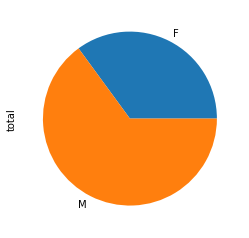

In [270]:
df.groupby("genre")["total"].sum().plot(kind='pie')

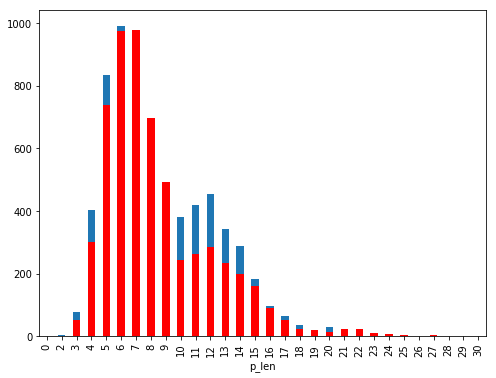

In [271]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(8,6))
df[df["genre"] == "M"].groupby("p_len")["total"].count().plot(kind="bar", ax=ax)
df[df["genre"] == "F"].groupby("p_len")["total"].count().plot(kind="bar", ax=ax, color="red")
plt.show()

In [31]:
df

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102
5,Daniel,M,7821
6,Gérard,M,7009
7,Jean-Pierre,M,6945
8,Patrick,M,6884
9,Pierre,M,6711


In [27]:
import seaborn as sns

In [33]:
sns.barplot(x="p_len", y="total", hue="genre", data=df)

ValueError: Could not interpret input 'total'

In [35]:
import matplotlib.pyplot as plt

In [39]:
(df["genre"] == "M").sum()

6581

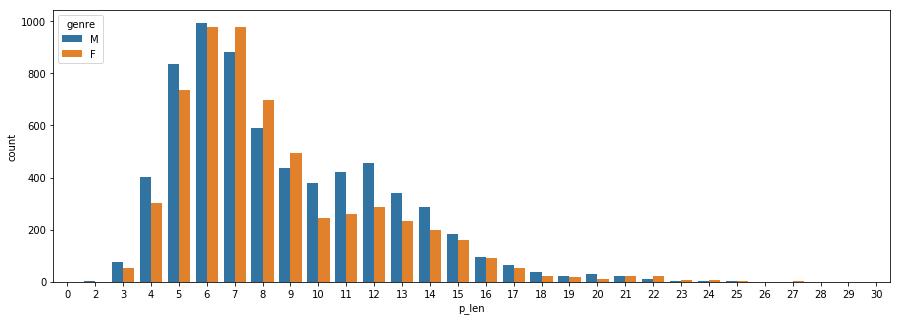

In [37]:
plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="p_len", hue="genre", data=df)

In [208]:
df.head()

,prenom,genre,total,p_len
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


In [222]:
female = df[df["genre"] == "F"].reset_index(drop=True)

In [223]:
female["rnk"] = female["nb"].rank(ascending=False, method="max")

In [224]:
female

,prenom,genre,nb,rnk
0,Catherine,F,4389,1.0
1,Françoise,F,4334,2.0
2,Isabelle,F,4295,3.0
3,Sylvie,F,4197,4.0
4,Martine,F,4094,5.0
5,Nathalie,F,3942,6.0
6,Christine,F,3637,7.0
7,Monique,F,3005,8.0
8,Chantal,F,2835,9.0
9,Nicole,F,2798,10.0


In [225]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


In [229]:
reference = pd.DataFrame({
    "gen": ["M", "F"],
    "description": ["Homme", "Femme"],
})

In [230]:
reference

,gen,description
0,M,Homme
1,F,Femme


In [233]:
df.merge(reference, left_on="genre", right_on="gen", how="inner")

,prenom,genre,nb,gen,description
0,Michel,M,14136,M,Homme
1,Alain,M,10646,M,Homme
2,Philippe,M,9903,M,Homme
3,Bernard,M,8992,M,Homme
4,Christian,M,8102,M,Homme
5,Daniel,M,7821,M,Homme
6,Gérard,M,7009,M,Homme
7,Jean-Pierre,M,6945,M,Homme
8,Patrick,M,6884,M,Homme
9,Pierre,M,6711,M,Homme


In [234]:
A = pd.DataFrame({
    "name": ["pomme", "kiwi", "poire"],
    "prix": [1, 2, 3],
})
B = pd.DataFrame({
    "name": ["pomme", "carotte", "kiwi"],
    "couleur": ["jaune", "orange", "vert"]
})

In [235]:
A.merge(B)

,name,prix,couleur
0,pomme,1,jaune
1,kiwi,2,vert


In [236]:
A.merge(B, how='left')

,name,prix,couleur
0,pomme,1,jaune
1,kiwi,2,vert
2,poire,3,NaN


In [237]:
A.merge(B, how='right')

,name,prix,couleur
0,pomme,1.0,jaune
1,kiwi,2.0,vert
2,carotte,NaN,orange


In [240]:
A.join(B, lsuffix="_left")

,name_left,prix,name,couleur
0,pomme,1,pomme,jaune
1,kiwi,2,carotte,orange
2,poire,3,kiwi,vert


In [243]:
A.set_index("name").join(B.set_index("name"))

,prix,couleur
name,,
pomme,1,jaune
kiwi,2,vert
poire,3,NaN
